# Data Preprocessing on Student Dummies

Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# Loading Student Dummies into the Pandas DataFrame

In [2]:
df = pd.read_csv(r"D:\ML_DATASETS\student_dummies.csv")

# Fetching Shape of the Dataset

In [3]:
print("Shape of the Dataset".center(50,'-'))
print("Total no. of Rows:",df.shape[0])
print("Total no. of Columns:",df.shape[1])

---------------Shape of the Dataset---------------
Total no. of Rows: 125
Total no. of Columns: 15


# Fetching Column Names from the dataframe

In [4]:
print("Column List".center(50,'-'))
for column in df.columns:
    print(column)

-------------------Column List--------------------
Sr_no
Roll No
StudentName
Gender
Age
Semester
Division
ML
ADA
AJ
CS
MERN
Total
Percentage
Result


# Fetching first 5 rows from the dataframe

In [5]:
df.head()

Sr_no  Roll No StudentName  Gender   Age  Semester Division  ML  ADA  AJ  \
0      1        1        ABC1    Male  22.0         7        A  20    7  35   
1      2        2        ABC2  Female  22.0         7        B  48   34  28   
2      3        3        ABC3    Male  22.0         7        B  23   11   4   
3      4        4        ABC4  Female  23.0         7        B  48    8   6   
4      5        5        ABC5    Male  21.0         7        A  40   26  24   

   CS  MERN  Total  Percentage Result  
0  25    17    104        41.6   PASS  
1  19    34    163        65.2   PASS  
2  23    48    109        43.6   PASS  
3  24    13     99        39.6   FAIL  
4  43    22    155        62.0   PASS

# Fetching Last 5 rows from the Dataframe

In [6]:
df.tail()

Sr_no  Roll No StudentName  Gender   Age  Semester Division  ML  ADA  AJ  \
120    116      116      ABC116  Female  19.0         7        B  19   28  10   
121    117      117      ABC117    Male  23.0         7        A  47   17  29   
122    118      118      ABC118    Male  18.0         7        A  47   23  22   
123    119      119      ABC119  Female  22.0         7        A  38   22  29   
124    120      120      ABC120    Male  19.0         7        A  24   26   7   

     CS  MERN  Total  Percentage Result  
120  24    30    111        44.4   PASS  
121  35    16    144        57.6   PASS  
122  40    24    156        62.4   PASS  
123  18    30    137        54.8   PASS  
124  23    36    116        46.4   PASS

# Basic Summarized Information of the DataFrame

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sr_no        125 non-null    int64  
 1   Roll No      125 non-null    int64  
 2   StudentName  125 non-null    object 
 3   Gender       125 non-null    object 
 4   Age          121 non-null    float64
 5   Semester     125 non-null    int64  
 6   Division     121 non-null    object 
 7   ML           125 non-null    int64  
 8   ADA          125 non-null    int64  
 9   AJ           125 non-null    int64  
 10  CS           125 non-null    int64  
 11  MERN         125 non-null    int64  
 12  Total        125 non-null    int64  
 13  Percentage   125 non-null    float64
 14  Result       125 non-null    object 
dtypes: float64(2), int64(9), object(4)
memory usage: 14.8+ KB


# Detecting Outliers using Statistical Information

In [8]:
df.describe()

Sr_no     Roll No         Age  Semester          ML         ADA  \
count  125.000000  125.000000  121.000000     125.0  125.000000  125.000000   
mean    62.800000   62.800000   23.694215       7.0   34.664000   21.744000   
std     35.906465   35.906465   23.930748       0.0   10.128962   10.473395   
min      1.000000    1.000000    2.000000       7.0   18.000000    5.000000   
25%     32.000000   32.000000   20.000000       7.0   25.000000   13.000000   
50%     63.000000   63.000000   21.000000       7.0   36.000000   22.000000   
75%     94.000000   94.000000   22.000000       7.0   43.000000   30.000000   
max    120.000000  120.000000  222.000000       7.0   50.000000   40.000000   

               AJ        CS        MERN       Total  Percentage  
count  125.000000  125.0000  125.000000  125.000000   125.00000  
mean    17.360000   29.8480   29.384000  133.000000    53.20000  
std     10.060623    9.1608   11.011566   21.910375     8.76415  
min      0.000000   15.0000   12.000000   78.000000    31.20000  
25%      9.000000   23.0000   19.000000  118.000000    47.20000  
50%     18.000000   29.0000   30.000000  131.000000    52.40000  
75%     24.000000   38.0000   38.000000  145.000000    58.00000  
max     35.000000   45.0000   48.000000  191.000000    76.40000

# Data Remidiation Techniques

# FInding and Handling Duplicate Values

In [9]:
print("Total No. of Duplicate Values:",df.duplicated().sum())

Total No. of Duplicate Values: 5


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
print("After Handling Duplicate Values.. No. of Duplicates:",df.duplicated().sum())

After Handling Duplicate Values.. No. of Duplicates: 0


# Detecting and Handling Outliers

Finding Lower Limit using 0.25 Quantile

In [12]:
lower = df.Age.quantile(0.25)
lower

20.0

Finding Upper Limit using 0.75 Quantile

In [13]:
upper = df.Age.quantile(0.75)
upper

22.0

Finding Inter Quantile Range (IQR)

In [14]:
IQR = upper - lower
IQR

2.0

Finding Lower Limit

In [15]:
lowerlimit = lower - 1.5 * IQR
lowerlimit

17.0

FInding Upper Limit

In [16]:
upperlimit = upper + 1.5 * IQR
upperlimit

25.0

# Detecting Lower Outliers

In [17]:
df[(df.Age < lowerlimit)]

Sr_no  Roll No StudentName  Gender  Age  Semester Division  ML  ADA  AJ  \
8      9        9        ABC9  Female  2.0         7        A  49   37  23   

   CS  MERN  Total  Percentage Result  
8  36    16    161        64.4   PASS

# Detecting Upper Outliers

In [18]:
df[(df.Age > upperlimit)]

Sr_no  Roll No StudentName  Gender    Age  Semester Division  ML  ADA  AJ  \
5       6        6        ABC6    Male  222.0         7      NaN  32   10  22   
30     31       31       ABC31  Female  190.0         7        A  37   34   0   

    CS  MERN  Total  Percentage Result  
5   35    19    118        47.2   PASS  
30  35    47    153        61.2   PASS

# Droping Both Upper and Lower Outliers

In [19]:
cleandata = df[(df.Age >= lowerlimit) & (df.Age <= upperlimit)]

In [21]:
cleandata.describe()

Sr_no     Roll No         Age  Semester          ML         ADA  \
count  113.000000  113.000000  113.000000     113.0  113.000000  113.000000   
mean    60.911504   60.911504   20.814159       7.0   34.575221   21.398230   
std     34.566075   34.566075    1.497311       0.0   10.149600   10.721757   
min      1.000000    1.000000   18.000000       7.0   18.000000    5.000000   
25%     32.000000   32.000000   20.000000       7.0   25.000000   12.000000   
50%     61.000000   61.000000   21.000000       7.0   36.000000   21.000000   
75%     90.000000   90.000000   22.000000       7.0   43.000000   31.000000   
max    120.000000  120.000000   23.000000       7.0   50.000000   40.000000   

               AJ          CS        MERN       Total  Percentage  
count  113.000000  113.000000  113.000000  113.000000  113.000000  
mean    17.168142   29.681416   29.637168  132.460177   52.984071  
std     10.091459    9.359168   11.063988   22.025568    8.810227  
min      0.000000   15.000000   12.000000   78.000000   31.200000  
25%      9.000000   22.000000   20.000000  118.000000   47.200000  
50%     18.000000   29.000000   30.000000  130.000000   52.000000  
75%     24.000000   38.000000   38.000000  145.000000   58.000000  
max     35.000000   45.000000   48.000000  191.000000   76.400000

# Detecting Outliers using Graphs and Plots

In [43]:
import matplotlib.pyplot as plt
import seaborn as sn
df = pd.read_csv(r"D:\ML_DATASETS\student_dummies.csv")

In [36]:
df.Age.plot.box()
plt.title("Detecting Outliers from the column Age")
plt.ylabel("Age Range")
plt.xlabel("Age Box Plot")



Text(0.5, 0, 'Age Box Plot')

Text(0.5, 0, 'Machine Learning Box Plot')

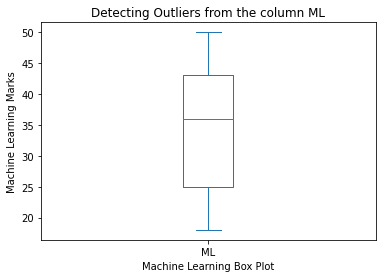

In [38]:
df.ML.plot.box()
plt.title("Detecting Outliers from the column ML")
plt.ylabel("Machine Learning Marks")
plt.xlabel("Machine Learning Box Plot")

In [39]:
sn.boxplot(x=df.Age)
plt.title("Detecting Outliers from the column Age")
plt.ylabel("Age Range")
plt.xlabel("Age Box Plot")

Text(0.5, 0, 'Age Box Plot')

In [41]:
sn.boxplot(x=df.ML)
plt.title("Detecting Outliers from the column ML")
plt.ylabel("Machine Learning Marks")
plt.xlabel("Machine Learning Box Plot")

Text(0.5, 0, 'Machine Learning Box Plot')

In [48]:
plt.scatter(df.index,df.Age,marker="*",color="red")
plt.title("Detecting Outliers from the column Age")
plt.xlabel("Index")
plt.ylabel("Age")
plt.show()

In [51]:
plt.scatter(df.index,df.ML,color="green")
plt.title("Detecting Outliers from the column ML")
plt.xlabel("Index")
plt.ylabel("Machine Learning Marks")
plt.show()

In [55]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [59]:
array = np.array([[100],[200],[300],[400],[500],[600],[700],[800]])
array

array([[100],
       [200],
       [300],
       [400],
       [500],
       [600],
       [700],
       [800]])

In [60]:
scaler = StandardScaler()
x = scaler.fit_transform(array)
x

array([[-1.52752523],
       [-1.09108945],
       [-0.65465367],
       [-0.21821789],
       [ 0.21821789],
       [ 0.65465367],
       [ 1.09108945],
       [ 1.52752523]])

In [62]:
scaler = MinMaxScaler()
x = scaler.fit_transform(array)
x

array([[0.        ],
       [0.14285714],
       [0.28571429],
       [0.42857143],
       [0.57142857],
       [0.71428571],
       [0.85714286],
       [1.        ]])

In [63]:
from sklearn.preprocessing import LabelEncoder

In [69]:
gender =pd.DataFrame(df.Gender)
division = pd.DataFrame(df.Division)
result = pd.DataFrame(df.Result)

In [73]:
le = LabelEncoder()
gender = pd.DataFrame(le.fit_transform(gender))
division = pd.DataFrame(le.fit_transform(division))
result = pd.DataFrame(le.fit_transform(result))
result

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0
0    1
1    1
2    1
3    0
4    1
..  ..
120  1
121  1
122  1
123  1
124  1

[125 rows x 1 columns]